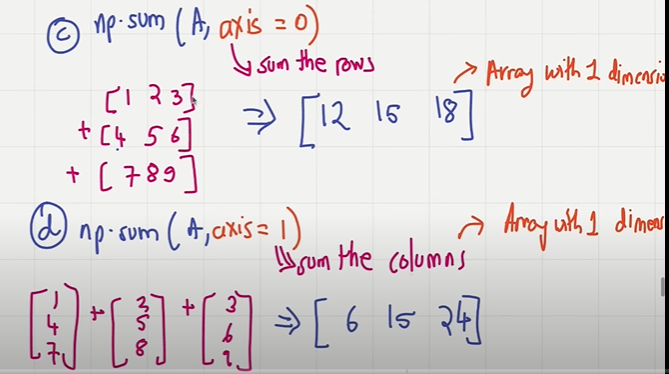

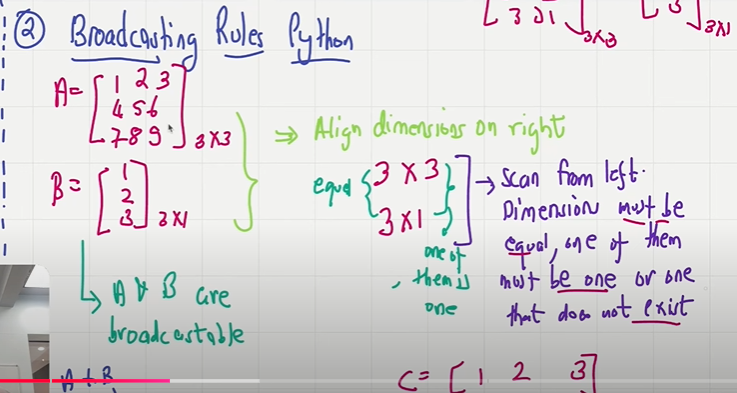

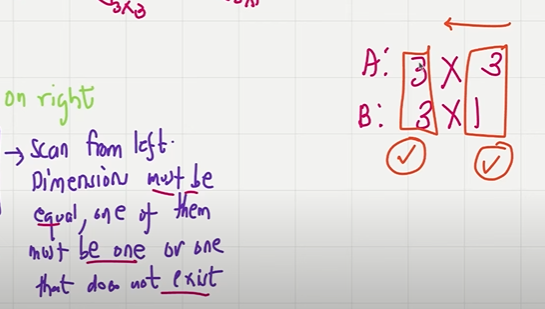

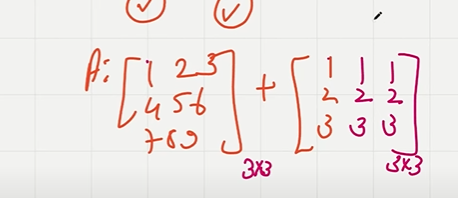

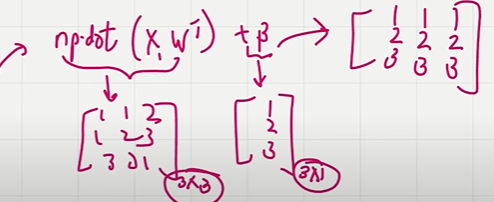

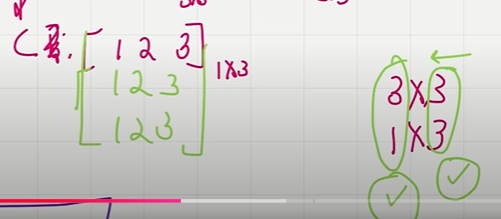

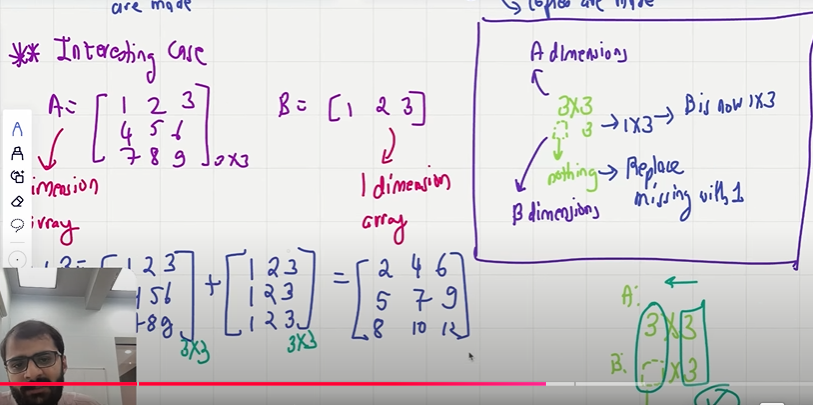

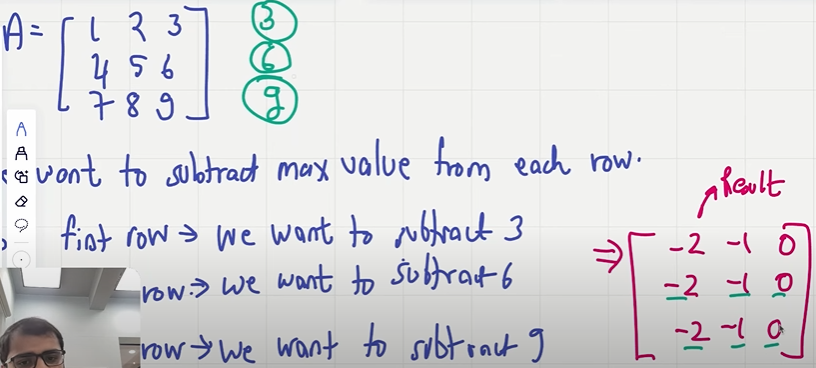


In [1]:
import numpy as np

In [2]:
### TRY THESE EXERCISES FOR YOURSELF!

A = [
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
    ]

print(np.sum(A))

print(np.sum(A, axis = 0))
print(np.sum(A, axis = 0).shape)

print(np.sum(A, axis = 1))
print(np.sum(A, axis = 1).shape)

print(np.sum(A, axis = 0,keepdims = True))
print(np.sum(A, axis = 0,keepdims = True).shape)

print(np.sum(A, axis = 1,keepdims = True))
print(np.sum(A, axis = 1,keepdims = True).shape)

print(np.max(A, axis = 0))
print(np.max(A, axis = 1))

45
[12 15 18]
(3,)
[ 6 15 24]
(3,)
[[12 15 18]]
(1, 3)
[[ 6]
 [15]
 [24]]
(3, 1)
[7 8 9]
[3 6 9]


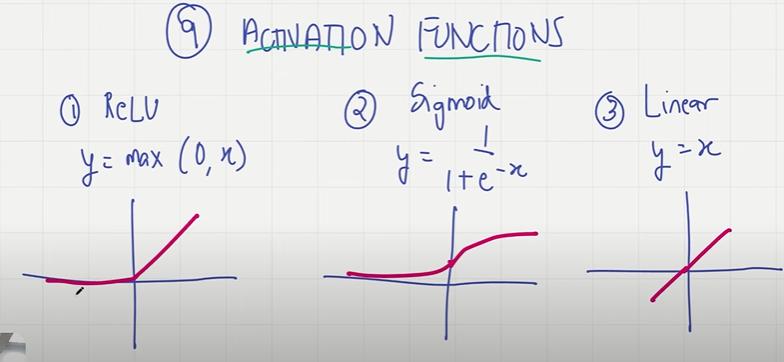

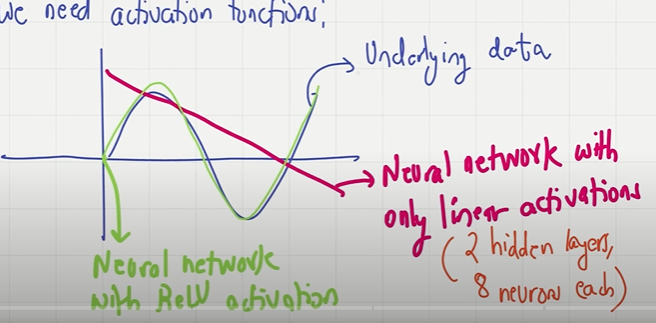

softmax activation

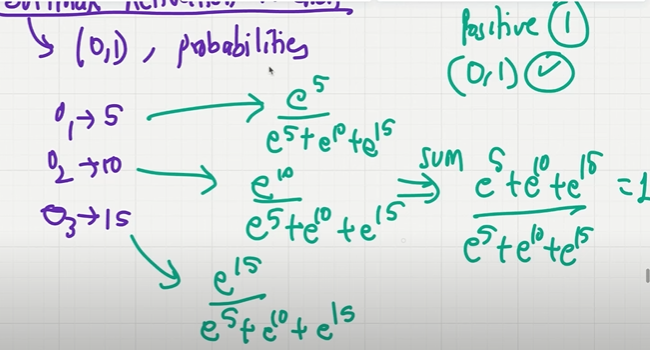

<!-- 26:31` -->

### for linear equation or relation

dont need hidden layer so the activation function inside except output layer

but in real life problem most of are non linear so a number of hidden layer is required so as activation function

### for Non Linear Equation

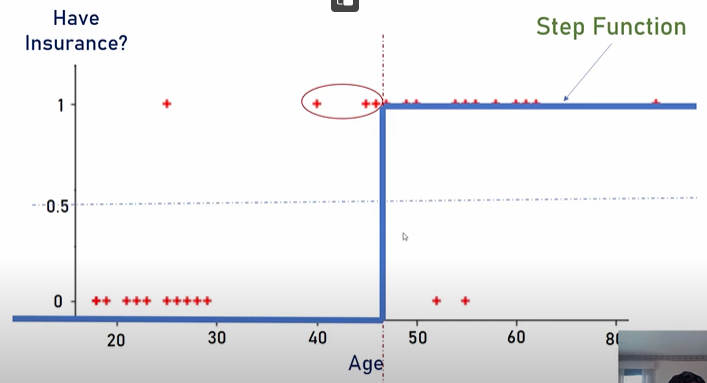

here contradict between 2 and 4

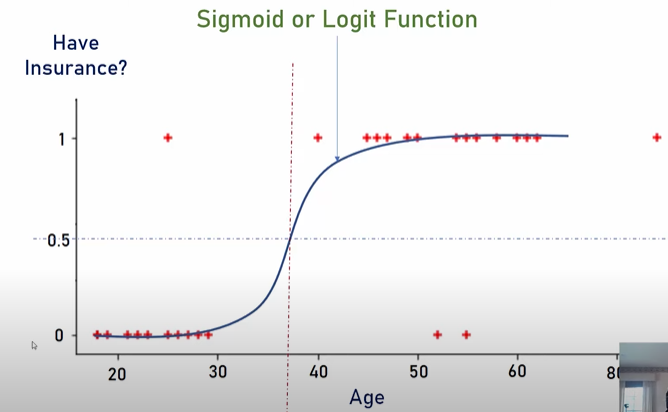

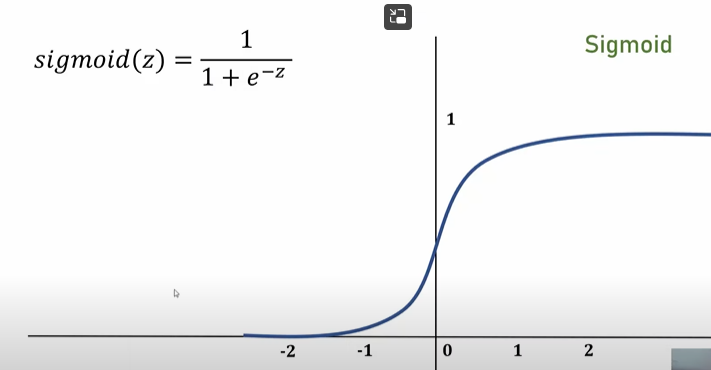

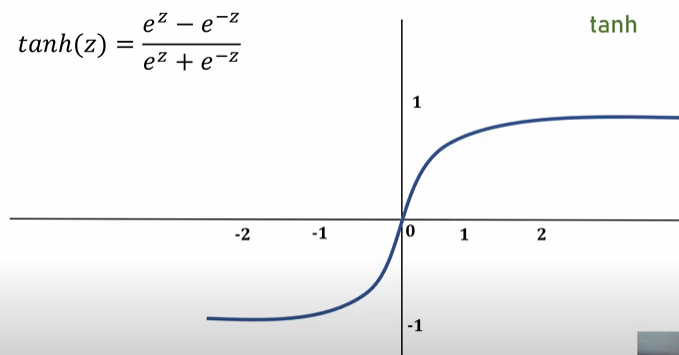

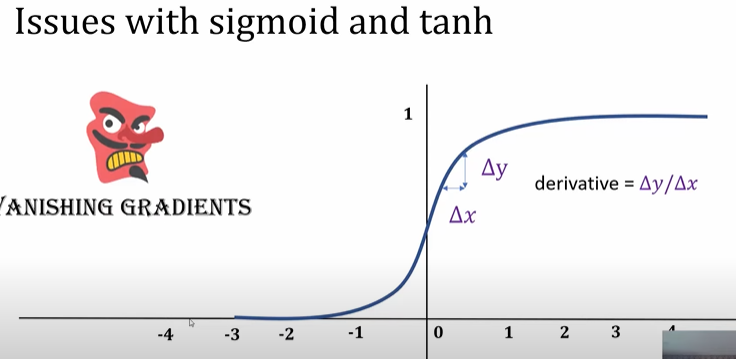


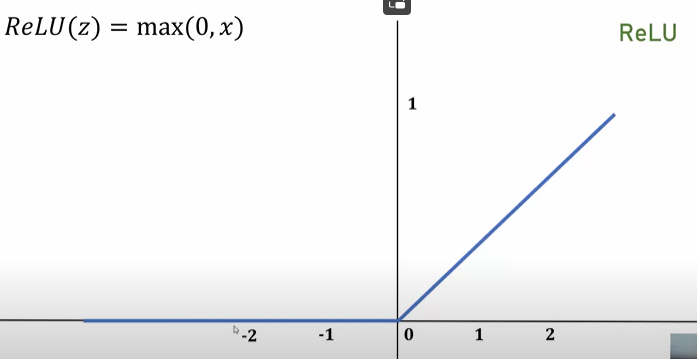


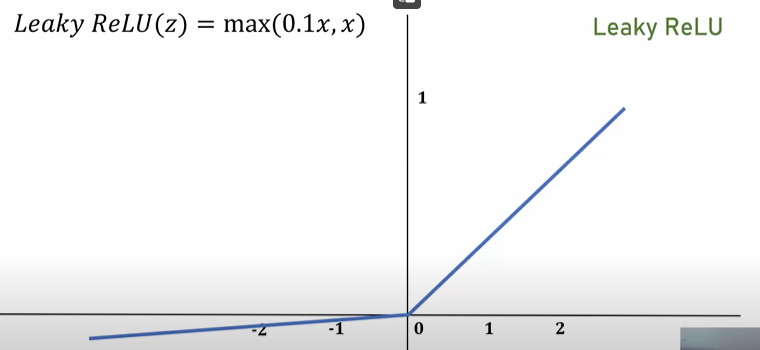

activatio ReLU

In [1]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [2]:
# ReLU activation
class Activation_ReLU:
 # Forward pass
 def forward(self, inputs):
 # Calculate output values from input
  self.output = np.maximum(0, inputs)

In [3]:
from Dense_Layer import Layer_Dense

In [4]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

In [8]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Make a forward pass of our training data through this layer
dense1.forward(X)
print(dense1.output[:5])



[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-4.4172935e-05  1.7795961e-04 -3.9071703e-05]
 [ 3.0106357e-05  3.6696982e-04 -9.3701252e-05]
 [-3.6547382e-04  1.9415646e-04 -8.2500537e-06]
 [-5.0237903e-04  1.6941362e-04  1.2681631e-05]]


In [9]:
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)
# Let's see output of the first few samples:
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.7795961e-04 0.0000000e+00]
 [3.0106357e-05 3.6696982e-04 0.0000000e+00]
 [0.0000000e+00 1.9415646e-04 0.0000000e+00]
 [0.0000000e+00 1.6941362e-04 1.2681631e-05]]


softmax activation

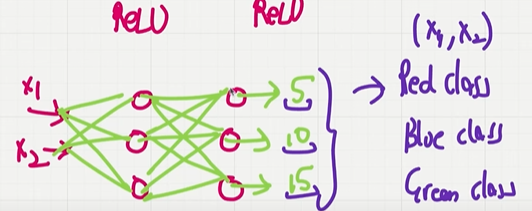


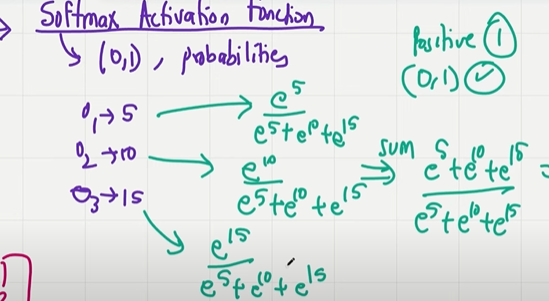

output

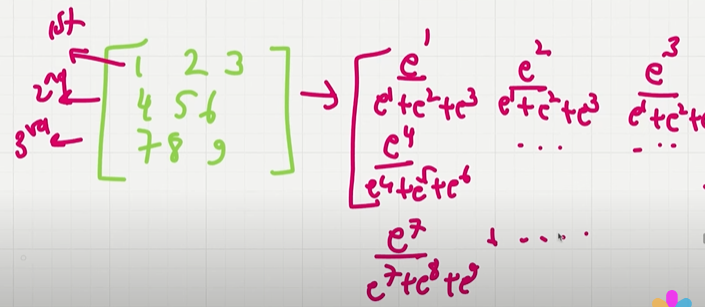


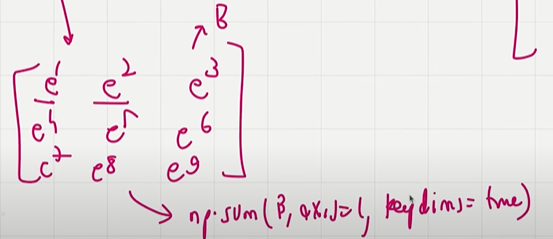

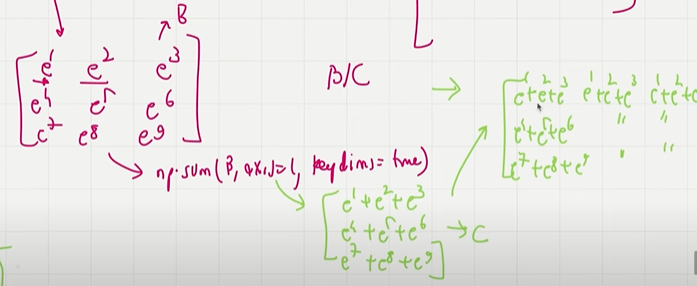

In [10]:
inputs = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
    ]
# Get unnormalized probabilities
exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
 # Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
print(probabilities)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


In [11]:
np.sum(probabilities, axis = 1)

array([1., 1., 1.])

In [12]:

class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

1st layer / input layer

In [13]:
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_Softmax()
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)
# Let's see output of the first few samples:
print(activation1.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33330807 0.33338213 0.3333098 ]
 [0.33330965 0.33342195 0.33326837]
 [0.33323148 0.333418   0.33335054]
 [0.3332015  0.3334254  0.33337313]]


2nd layer / 1st hidden layer

In [14]:
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33374715 0.33348075 0.3327721 ]
 [0.33374715 0.33348063 0.33277225]
 [0.33374706 0.3334805  0.3327725 ]
 [0.33374736 0.33348042 0.3327722 ]
 [0.3337475  0.3334804  0.33277214]]
